### Import Dataset

In [1]:
import pandas as pd
import numpy as np

# import tables
all_df = pd.read_csv("C:\\Users\\Joyce\\OneDrive - Emory University\\Desktop\\Emory MSBA\\Marketing Analytics\\Team 8-Project1\\all_df.csv")
all_df['id'] = all_df.groupby(['cust_id','tran_dt']).ngroup()

In [2]:
len(all_df)

29617075

In [3]:
all_df.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,prod_unit_price,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,0.00,0.00,3497
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,19267
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,38575
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,38589
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,...,0.7225,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,38611


In [4]:
list(all_df.columns)

['cust_id',
 'tran_id',
 'tran_dt',
 'store_id',
 'prod_id',
 'prod_unit',
 'tran_prod_sale_amt',
 'tran_prod_sale_qty',
 'tran_prod_discount_amt',
 'tran_prod_offer_cts',
 'tran_prod_paid_amt',
 'prod_unit_price',
 'subcategory_id',
 'sub_category_desc',
 'category_id',
 'category_desc',
 'brand_desc',
 'category_desc_eng',
 'total_promo',
 'promo_prop',
 'id']

In [5]:
# create unique Identifier based on customer ID and transaction date
all_df['id'] = all_df.groupby(['cust_id','tran_dt']).ngroup()

In [6]:
# category_desc_eng is COLA DRINK
cola_c = all_df[all_df['category_desc_eng']=='COLA DRINK'] #178405 records

### Compare Coke and Pepsi in Transaction Data

In [7]:
# compare the brand composition in the COLA DRINK Category
cola_c.groupby('brand_desc').agg({"tran_prod_paid_amt":"sum","tran_prod_sale_qty":"sum","cust_id":"count",
                                'promo_prop':'mean','id':'count'})

,tran_prod_paid_amt,tran_prod_sale_qty,cust_id,promo_prop,id
brand_desc,,,,,
COCA COLA,260647.78,240571.0,109390,0.173478,109390
KENDY,4004.06,7693.0,4570,0.056717,4570
PEPSI COLA,18440.80,15929.0,10272,0.507203,10272
PRIVATE LABEL,57674.99,100510.0,54173,0.179816,54173


In [8]:
cola_c['brand_desc'].unique()

array(['COCA COLA', 'PEPSI COLA', 'PRIVATE LABEL', 'KENDY'], dtype=object)

In [31]:
# data frame include Coke and Pepsi Cola drink
drink = cola_c[(cola_c['brand_desc'] =='COCA COLA') | (cola_c['brand_desc'] =='PEPSI COLA')]
drink.head()
drink['cust_id'].nunique()

6966

In [10]:
drink_compare = drink.groupby('brand_desc').agg({"tran_prod_paid_amt":"sum","tran_prod_sale_qty":"sum","cust_id":"count",
                                'promo_prop':'mean','id':'count'})
drink_compare = drink_compare.rename(columns = {'tran_prod_paid_amt':'Revenue','tran_prod_sale_qty':'Sale_quantity',
                                               'cust_id':'num_customer','promo_prop':'avg_promotion','id':'num_trans'})
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# find the peak sales time for cola drinks
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')

import datetime as dt
drink['tran_dt'] = pd.to_datetime(drink['tran_dt'])
drink['month']= drink['tran_dt'].dt.strftime('%m')

drink_month = drink.groupby('month').agg({"tran_prod_paid_amt":"sum"})
drink_month.sort_values(by='tran_prod_paid_amt',ascending=False) 

,tran_prod_paid_amt
month,
12,30405.81
08,28474.46
04,27718.42
07,26176.09
06,25096.52
05,24874.55
03,24441.31
09,21794.93
10,20207.83


In [12]:
# narrow the scope to only sale in July and August

# create month for each record in all_df
all_df['tran_dt'] = pd.to_datetime(all_df['tran_dt'])
all_df['month']= all_df['tran_dt'].dt.strftime('%m')

# only sales in July and August
#summer = all_df[(all_df['month'] == '07') | (all_df['month'] =='08')]
#summer

## Product Segmentation to find target products to promote

* Sale Quantity
* Revenue
* Number of Transactions
* Promotion Discount

### Coke

In [13]:
drink_coke = drink[drink['brand_desc'] =='COCA COLA']
drink_coke['prod_id'].nunique()

21

In [14]:
# find the coke product clusters
coke_pd = drink_coke.groupby(['prod_id']).agg({
    'tran_prod_sale_qty':'sum',
    'id': 'count',
    'promo_prop': 'mean',
    'tran_prod_paid_amt': 'sum'})

# Rename columns
coke_pd.rename(columns = {'tran_prod_sale_qty':'sale_quantity','id': 'trans_freq',
                            'promo_prop': 'avg_promo_prop',
                            'tran_prod_paid_amt': 'revenue'}, inplace=True)

# Normalize/Scale the Variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(coke_pd)
coke_pd_normalized = scaler.transform(coke_pd)
print(coke_pd_normalized.mean(axis = 0).round(2))
print(coke_pd_normalized.std(axis = 0).round(2))

[ 0. -0.  0. -0.]
[1. 1. 1. 1.]


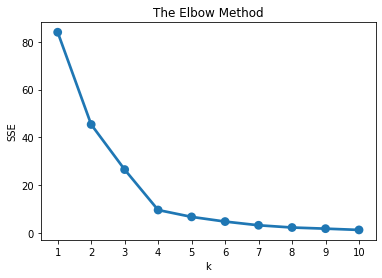

In [15]:
# K means clustering
# Choose k-number
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coke_pd_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [16]:
# 4 clusters are ideal to implement
# apply k means clustering with 4 clusters
model_coke_pd = KMeans(n_clusters=4, random_state=42)
model_coke_pd.fit(coke_pd_normalized)
model_coke_pd.labels_.shape

(21,)

In [17]:
# cluster analysis
coke_pd["Cluster"] = model_coke_pd.labels_
coke_pd.head()

,sale_quantity,trans_freq,avg_promo_prop,revenue,Cluster
prod_id,,,,,
999153856,11569.0,4490,0.228110,15199.06,1
999153857,20428.0,8069,0.224166,30017.32,1
999165545,10228.0,4652,0.104987,17388.54,0
999165976,19308.0,12664,0.248026,21239.57,1
999224991,6243.0,3669,0.296712,6894.67,2


In [18]:
# summary statistics about the clusters
coke_pd.groupby('Cluster').agg({
    'sale_quantity':'mean',
    'trans_freq':'mean',
    'avg_promo_prop':'mean',
    'revenue':['mean', 'count']}).round(1)

sale_quantity trans_freq avg_promo_prop  revenue      
                 mean       mean           mean     mean count
Cluster                                                       
0              5360.6     2050.4            0.1   4749.6     8
1             19702.0     9512.8            0.2  19804.5     6
2              4416.3     2296.7            0.4   4642.5     6
3             52976.0    22130.0            0.1  75968.5     1

In [19]:
# snake plots
coke_df_normalized = pd.DataFrame(coke_pd_normalized, columns=['sale_quantity', 'trans_freq', 'avg_promo_prop','revenue'])
coke_df_normalized['ID'] = coke_pd.index
coke_df_normalized['Cluster'] = model_coke_pd.labels_
coke_df_normalized.head()

,sale_quantity,trans_freq,avg_promo_prop,revenue,ID,Cluster
0,0.009272,-0.134515,0.260913,0.170263,999153856,1
1,0.734657,0.535021,0.232537,1.075451,999153857,1
2,-0.100531,-0.104209,-0.624924,0.304009,999165545,0
3,0.642950,1.394624,0.404203,0.539254,999165976,1
4,-0.426827,-0.288102,0.754485,-0.337020,999224991,2


In [20]:
# Melt The Data
coke_df_nor_melt = pd.melt(coke_df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['sale_quantity', 'trans_freq', 'avg_promo_prop','revenue'],
                      var_name='Attribute',
                      value_name='Value')
coke_df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,999153856,1,sale_quantity,0.009272
1,999153857,1,sale_quantity,0.734657
2,999165545,0,sale_quantity,-0.100531
3,999165976,1,sale_quantity,0.642950
4,999224991,2,sale_quantity,-0.426827


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

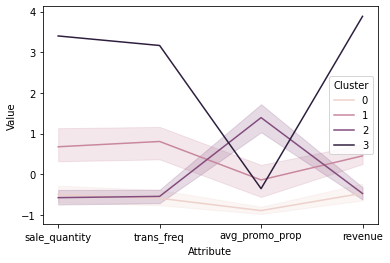

In [21]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=coke_df_nor_melt)
#f1.figure.savefig("output.png")

###### Cluster Analysis

* Cluster 0: 8 products, low on all four criteria
* Cluster 1: 6 products, high on transaction frequency, but low on promotion, have a good potential to drive revenue (target coke products)
* Cluster 2: 6 products, high on average promotion, but low on revenue
* Cluster 3: 1 product, premium product, the traffic driver, low promotion, but drive the highest profit (target products)

### Pepsi

In [22]:
drink_pepsi = drink[drink['brand_desc'] =='PEPSI COLA']
drink_pepsi['prod_id'].nunique()

5

In [23]:
# find the coke product clusters
pepsi_pd = drink_pepsi.groupby(['prod_id']).agg({
    'tran_prod_sale_qty':'sum',
    'id': 'count',
    'promo_prop': 'mean',
    'tran_prod_paid_amt': 'sum'})

# Rename columns
pepsi_pd.rename(columns = {'tran_prod_sale_qty':'sale_quantity','id': 'trans_freq',
                            'promo_prop': 'avg_promo_prop',
                            'tran_prod_paid_amt': 'revenue'}, inplace=True)
pepsi_pd

,sale_quantity,trans_freq,avg_promo_prop,revenue
prod_id,,,,
999167784,3164.0,2377,0.561167,4070.28
999225580,728.0,556,0.511766,717.52
999237426,4252.0,1840,0.431398,3416.12
999349816,4872.0,3279,0.568314,6837.30
999590416,2913.0,2220,0.420848,3399.58


### Non-Target Customers

* Customers consume the targeted Coke and Pepsi Products

In [65]:
# Target Coke and Pepsi Products:
# Product ID for Coke

coke_pd_ix = coke_pd.reset_index()
coke_pd_ix['prod_id'][coke_pd_ix['Cluster'] == 1]
coke_pd_ix['prod_id'][coke_pd_ix['Cluster'] == 3]

18    999422862
Name: prod_id, dtype: int64

In [46]:
# Product ID for Pepsi
# 999349816,999590416

,sale_quantity,trans_freq,avg_promo_prop,revenue
prod_id,,,,
999167784,3164.0,2377,0.561167,4070.28
999225580,728.0,556,0.511766,717.52
999237426,4252.0,1840,0.431398,3416.12
999349816,4872.0,3279,0.568314,6837.30
999590416,2913.0,2220,0.420848,3399.58


In [66]:
# filter the all_df that contains the prod id above
non_target_cust = all_df[(all_df['prod_id'] == 999153856)\
                         |(all_df['prod_id'] == 999153857)|(all_df['prod_id'] == 999165976)\
                         |(all_df['prod_id'] == 999261787)|(all_df['prod_id'] == 999329592)\
                         |(all_df['prod_id'] == 999329593)|(all_df['prod_id'] == 999349816)\
                         |(all_df['prod_id'] == 999590416)|(all_df['prod_id'] == 999422862)]

non_target_cust

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id,month
937665,29568,2.017070e+18,2017-07-02,192,999153856,CT,3.54,2.0,-1.77,1,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,1.77,0.50,212,07
937666,29568,2.017072e+18,2017-07-23,192,999153856,CT,3.54,2.0,0.00,0,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,219,07
937667,29568,2.017073e+18,2017-07-29,192,999153856,CT,7.08,4.0,-3.54,1,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,3.54,0.25,221,07
937668,29568,2.017080e+18,2017-08-05,192,999153856,CT,3.54,2.0,0.00,0,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,224,08
937669,29568,2.017082e+18,2017-08-16,192,999153856,CT,3.54,2.0,0.00,0,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,229,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20739120,99839997,2.017111e+18,2017-11-12,347,999590416,CT,1.59,1.0,0.00,0,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.00,0.00,2680630,11
20739121,99839997,2.017112e+18,2017-11-24,347,999590416,CT,1.59,1.0,0.00,0,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.00,0.00,2680634,11
20739122,99839997,2.017120e+18,2017-12-02,347,999590416,CT,1.59,1.0,0.00,0,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.00,0.00,2680637,12
20739123,99839997,2.017122e+18,2017-12-16,347,999590416,CT,1.59,1.0,-0.15,1,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.15,1.00,2680642,12


In [67]:
# number of non-target customers --> 6500
non_target_cust['cust_id'].nunique()

6500

### Target Customers

* Bought Cola Drinks
* Never bought Coke nor Pepsi Cola
* Medium to high sensitive to promotions
* Loyal customers to cola drinks based on revenue
* Share similar purchasing behavior (similar items) with non-target customers based on cosine similiarity > 0.6

In [24]:
# customers bought COLA DRINKS --> cola_c
cola_c['cust_id'].nunique() # 7232 bought products in COLA DRINK
cola_c

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,prod_unit_price,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id
937665,29568,2.017070e+18,2017-07-02,192,999153856,CT,3.54,2.0,-1.77,1,...,1.77,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,1.77,0.50,212
937666,29568,2.017072e+18,2017-07-23,192,999153856,CT,3.54,2.0,0.00,0,...,1.77,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,219
937667,29568,2.017073e+18,2017-07-29,192,999153856,CT,7.08,4.0,-3.54,1,...,1.77,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,3.54,0.25,221
937668,29568,2.017080e+18,2017-08-05,192,999153856,CT,3.54,2.0,0.00,0,...,1.77,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,224
937669,29568,2.017082e+18,2017-08-16,192,999153856,CT,3.54,2.0,0.00,0,...,1.77,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21570582,99879872,2.016092e+18,2016-09-14,556,999642204,CT,0.89,1.0,0.00,0,...,0.89,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,2682443
21570583,99879872,2.016092e+18,2016-09-15,556,999642204,CT,0.89,1.0,0.00,0,...,0.89,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,2682444
21570584,99879872,2.017072e+18,2017-07-24,556,999642204,CT,0.99,1.0,0.00,0,...,0.99,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,2682639
21570585,99879872,2.017090e+18,2017-09-02,528,999642204,CT,1.98,2.0,0.00,0,...,0.99,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,2682666


In [270]:
# customer have never bought Coke nor Pepsi
customer = cola_c[(cola_c['brand_desc']=='KENDY') | (cola_c['brand_desc']=='PRIVATE LABEL')]
customer['cust_id'].nunique()

3561

In [271]:
# analyze the price sensitivity and revenue of the customers
cust = customer.groupby('cust_id').agg({'promo_prop':'mean',
                                       'tran_prod_paid_amt':'sum'})
# change column names
cust = cust.rename(columns={'promo_prop':'avg_promo','tran_prod_paid_amt':'revenue'})
cust.describe()

# only keep the customer with average promo_prop over 0.155 (the average between mean and medium)
# and customers loyal to drinking cola with revenue over 5
cust_filtered = cust[(cust['avg_promo'] > 0.155) & (cust['revenue'] > 5)]
cust_filtered = cust_filtered.reset_index()
#list(cust_filtered.columns)
cust_filtered

,cust_id,avg_promo,revenue
0,29568,0.174667,56.90
1,39856,0.230392,20.80
2,309971,0.156433,86.99
3,459915,0.400000,5.03
4,509554,0.273810,9.20
...,...,...,...
699,99369897,0.400000,13.96
700,99439924,0.226190,61.92
701,99829929,0.250000,5.04
702,99839997,0.156250,24.96


In [36]:
# num of target customer --> 704
# lay out the purchase activies of above customers in all_df
# load the transaction data
cust_activity = pd.merge(cust_filtered,all_df,on='cust_id')
cust_activity

,cust_id,avg_promo,revenue,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,...,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id,month
0,29568,0.174667,56.90,2.017072e+18,2017-07-25,168,152761009,CT,2.59,4.0,...,93992,IOGURTE LIQUIDO,95857,IOGURTE BEBIDA,DAN UP,YOGURT DRINK,1.3,0.25,220,07
1,29568,0.174667,56.90,2.016111e+18,2016-11-06,192,178722009,CT,1.84,6.0,...,93992,IOGURTE LIQUIDO,95857,IOGURTE BEBIDA,MIMOSA,YOGURT DRINK,0.0,0.00,101,11
2,29568,0.174667,56.90,2.016111e+18,2016-11-13,192,178722009,CT,1.84,6.0,...,93992,IOGURTE LIQUIDO,95857,IOGURTE BEBIDA,MIMOSA,YOGURT DRINK,0.0,0.00,104,11
3,29568,0.174667,56.90,2.016121e+18,2016-12-11,192,178722009,CT,1.84,6.0,...,93992,IOGURTE LIQUIDO,95857,IOGURTE BEBIDA,MIMOSA,YOGURT DRINK,0.0,0.00,116,12
4,29568,0.174667,56.90,2.016100e+18,2016-10-05,192,178722010,CT,1.84,6.0,...,93992,IOGURTE LIQUIDO,95857,IOGURTE BEBIDA,MIMOSA,YOGURT DRINK,0.0,0.00,87,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964296,99869771,0.158730,61.47,2.017111e+18,2017-11-14,158,999998053,CT,0.19,1.0,...,94854,SAL COMUM,96008,SAL,PRIVATE LABEL,SALT,0.0,0.00,2681571,11
2964297,99869771,0.158730,61.47,2.017123e+18,2017-12-30,158,999998053,CT,0.19,1.0,...,94854,SAL COMUM,96008,SAL,PRIVATE LABEL,SALT,0.0,0.00,2681591,12
2964298,99869771,0.158730,61.47,2.016023e+18,2016-02-27,158,999998208,CT,0.15,1.0,...,94853,SAL MESA,96008,SAL,PRIVATE LABEL,SALT,0.0,0.00,2681273,02
2964299,99869771,0.158730,61.47,2.017021e+18,2017-02-10,158,999998208,CT,0.19,1.0,...,94853,SAL MESA,96008,SAL,PRIVATE LABEL,SALT,0.0,0.00,2681439,02


In [254]:
# vector of target customer ID
cust_activity['cust_id'].nunique()

704

In [256]:
# find target customer array
target_cust_arr = cust_activity['cust_id'].unique()

In [96]:
# cosine similarity with non-target customers

# non-target customers dataframe with only customer id and prod_id
non_target_df = non_target_df[['cust_id','prod_id']]
non_target_df = pd.DataFrame(non_target_df)

# target customers dataframe with only customer id and prod_id
target_df = cust_activity[['cust_id','prod_id']]
target_df = pd.DataFrame(target_df)

In [127]:
# concate the two dataframes
frames = [non_target_df,target_df]
result = pd.concat(frames)
result

,cust_id,prod_id
937665,29568,999153856
937666,29568,999153856
937667,29568,999153856
937668,29568,999153856
937669,29568,999153856
...,...,...
2964296,99869771,999998053
2964297,99869771,999998053
2964298,99869771,999998208
2964299,99869771,999998208


In [174]:
result['cust_id'].nunique()

6588

In [147]:
# Caculate cosine similarity based on customer's number of products purchased
result_gb = result.groupby(['cust_id','prod_id']).agg({'prod_id':'count'})
result_gb

# rename columns
result_gb = result_gb.rename(columns={result_gb.columns[0]: "count" })
result_df = pd.DataFrame(result_gb)
result_df.reset_index()

,cust_id,prod_id,count
0,29568,152761009,1
1,29568,178722009,3
2,29568,178722010,4
3,29568,178722011,3
4,29568,178722012,2
...,...,...,...
789098,99989975,999422862,1
789099,99989987,999153857,2
789100,99989987,999165976,11
789101,99989987,999422862,3


In [202]:
# conver the long to wide format to calculate cosine similarity
result_wide = pd.pivot_table(result_df,index='cust_id',columns='prod_id',values='count')
result_wide = result_wide.fillna(0)
result_wide

prod_id,145519008,145519009,145519010,145519011,145519012,148066012,152576008,152576009,152576010,152576011,...,999998014,999998016,999998053,999998208,999998779,999999154,999999155,999999193,999999218,999999656
cust_id,,,,,,,,,,,,,,,,,,,,,
29568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0
29909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,14.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0
59984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99969769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99989975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
# cosine similarity caculation
from sklearn.metrics.pairwise import cosine_similarity
cos_result = cosine_similarity(result_wide)

# fill the diagonal as 0 since they are the same customer

np.fill_diagonal(cos_result, 0)
similarity_with_cust =pd.DataFrame(cos_result,index=result_wide.index)
similarity_with_cust.columns=result_wide.index
similarity_with_cust.head()

cust_id,29568,29909,39774,39856,59984,109693,109959,119781,139662,169587,...,99899717,99899820,99929945,99939955,99959807,99969716,99969769,99989975,99989987,99999776
cust_id,,,,,,,,,,,,,,,,,,,,,
29568,0.000000,0.018430,0.073988,0.493092,0.009493,0.004310,0.023357,0.000000,0.000000,0.000874,...,0.012007,0.008906,0.000000,0.001880,0.015449,0.018985,0.059666,0.020137,0.007538,0.000000
29909,0.018430,0.000000,0.160128,0.003514,0.554700,0.377754,0.755536,0.196116,0.392232,0.017021,...,0.701646,0.260219,0.163178,0.109847,0.741550,0.277350,0.625786,0.392232,0.423546,0.392232
39774,0.073988,0.160128,0.000000,0.000000,0.000000,0.032765,0.329775,0.000000,0.000000,0.053149,...,0.365148,0.238343,0.000000,0.114332,0.067116,0.288675,0.465242,0.408248,0.105802,0.000000
39856,0.493092,0.003514,0.000000,0.000000,0.002112,0.006352,0.002969,0.005973,0.000000,0.000000,...,0.002671,0.001268,0.004970,0.000418,0.003437,0.000000,0.001021,0.000000,0.006192,0.000000
59984,0.009493,0.554700,0.000000,0.002112,0.000000,0.255377,0.483312,0.000000,0.000000,0.705774,...,0.632456,0.713057,0.392232,0.792118,0.929981,0.000000,0.241747,0.000000,0.122169,0.000000


In [221]:
# find the top neighbors based on filtered cos similarity score
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [225]:
# top 5 neighbors
sim_user_5 = find_n_neighbours(similarity_with_cust,5)
sim_user_5.head()

,top1,top2,top3,top4,top5
cust_id,,,,,
29568,89379863,80089949,11939811,82589923,32699793
29909,76539937,7609729,45519694,25229774,10029739
39774,13239978,1139567,14699979,339918,79499693
39856,58969880,60449806,74219950,83549899,70209669
59984,2589576,4529875,55699764,16259968,98629985
...,...,...,...,...,...
99969716,8009581,68619793,46769985,31839978,30629712
99969769,91139797,53679648,85399739,21629812,89519798
99989975,64909636,9499680,41389536,76579825,2109544


In [251]:
# extract the upper triangel of the correlation matrix, excluding the diagonal
cust_df = similarity_with_cust.where(~np.tril(np.ones(similarity_with_cust.shape)).astype(np.bool))
cust_df

cust_id,29568,29909,39774,39856,59984,109693,109959,119781,139662,169587,...,99899717,99899820,99929945,99939955,99959807,99969716,99969769,99989975,99989987,99999776
cust_id,,,,,,,,,,,,,,,,,,,,,
29568,NaN,0.01843,0.073988,0.493092,0.009493,0.004310,0.023357,0.000000,0.000000,0.000874,...,0.012007,0.008906,0.000000,0.001880,0.015449,0.018985,0.059666,0.020137,0.007538,0.000000
29909,NaN,NaN,0.160128,0.003514,0.554700,0.377754,0.755536,0.196116,0.392232,0.017021,...,0.701646,0.260219,0.163178,0.109847,0.741550,0.277350,0.625786,0.392232,0.423546,0.392232
39774,NaN,NaN,NaN,0.000000,0.000000,0.032765,0.329775,0.000000,0.000000,0.053149,...,0.365148,0.238343,0.000000,0.114332,0.067116,0.288675,0.465242,0.408248,0.105802,0.000000
39856,NaN,NaN,NaN,NaN,0.002112,0.006352,0.002969,0.005973,0.000000,0.000000,...,0.002671,0.001268,0.004970,0.000418,0.003437,0.000000,0.001021,0.000000,0.006192,0.000000
59984,NaN,NaN,NaN,NaN,NaN,0.255377,0.483312,0.000000,0.000000,0.705774,...,0.632456,0.713057,0.392232,0.792118,0.929981,0.000000,0.241747,0.000000,0.122169,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.644658,0.707107,0.183254,0.000000
99969769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911685,0.295341,0.000000
99989975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259161,0.000000


In [350]:
# stack and filter all values that are above 0.6
cust_df_filtered = cust_df.stack()
cust_df_filtered = cust_df_filtered[cust_df_filtered > 0.6]

In [351]:
# assgin names, and make it to dataframe
cust_df_filtered.name = 'Cosine Similarity Score'
cust_df_filtered.index.names = ['cust_id', 'cust2']
cust = cust_df_filtered[cust_df_filtered > 0.6].to_frame()
cust = cust.reset_index()
cust

,cust_id,cust2,Cosine Similarity Score
0,29568,89379863,0.623276
1,29909,109959,0.755536
2,29909,229838,0.832050
3,29909,299749,0.880705
4,29909,389613,0.784465
...,...,...,...
4077553,99899820,99959807,0.619503
4077554,99929945,99989987,0.790660
4077555,99969716,99969769,0.644658
4077556,99969716,99989975,0.707107


In [283]:
cust['cust2'].nunique()

6184

In [278]:
import gc
gc.collect()

123

In [291]:
# match the columns, and filter the data
# cust1 = target cust

m = cust['cust_id'].isin(cust_filtered['cust_id'])
cust = cust[m]
cust

,cust_id,cust2,Cosine Similarity Score
0,29568,89379863,0.623276
2226,39856,459915,0.619639
2227,39856,509554,0.771952
2228,39856,819895,0.705555
2229,39856,1109826,0.733326
...,...,...,...
4068772,95029959,99169981,0.614001
4069391,95229569,99169981,0.607442
4069392,95229569,99259910,0.632252
4069747,95339895,99169981,0.624875


In [304]:
cust['cust_id'].nunique()

314

In [305]:
cust_new = cust.drop(columns = ['cust2','Cosine Similarity Score'])

In [558]:
import gc
gc.collect()

456

In [313]:
# merge with the target customer dataframe

#m = cust['cust_id'].isin(cust_filtered['cust_id'])
#cust = cust[m]
#cust

cust_condition = all_df['cust_id'].isin(cust_new['cust_id'])
final_target_cust = all_df[cust_condition]

final_target_cust
#final_target_cust = pd.merge(cust_new,all_df,on='cust_id', how='inner')
#final_target_cust

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id,month
94,25869803,2.017112e+18,2017-11-25,336,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,696762,11
95,25869803,2.017122e+18,2017-12-19,336,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,696778,12
103,26889766,2.017111e+18,2017-11-07,162,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,724661,11
112,28719593,2.017103e+18,2017-10-26,609,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,776649,10
113,28719593,2.017111e+18,2017-11-11,609,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,776659,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29616735,54199733,2.016093e+18,2016-09-29,316,999999656,KG,3.20,1.608,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,1446351,09
29616771,57799695,2.016042e+18,2016-04-20,662,999999656,KG,3.22,1.618,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,1532455,04
29616780,58969880,2.016111e+18,2016-11-07,311,999999656,KG,3.06,1.538,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,1559620,11
29616912,77959895,2.017041e+18,2017-04-07,669,999999656,KG,2.77,1.391,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,2078212,04


In [314]:
# target customer --> 314 
final_target_cust['cust_id'].nunique() 

314

### Recommender System

* Find 3 most similar baseline customers based on cosine similarity
* Predict the average score of the target products based on the 3 similar users, rank the scores of those products, and recommend the top 1 product

In [333]:
# non-target customer 
non_target_cust

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id,month
937665,29568,2.017070e+18,2017-07-02,192,999153856,CT,3.54,2.0,-1.77,1,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,1.77,0.50,212,07
937666,29568,2.017072e+18,2017-07-23,192,999153856,CT,3.54,2.0,0.00,0,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,219,07
937667,29568,2.017073e+18,2017-07-29,192,999153856,CT,7.08,4.0,-3.54,1,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,3.54,0.25,221,07
937668,29568,2.017080e+18,2017-08-05,192,999153856,CT,3.54,2.0,0.00,0,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,224,08
937669,29568,2.017082e+18,2017-08-16,192,999153856,CT,3.54,2.0,0.00,0,...,93718,BEB COLA DIETA/LIGHT,95807,BEBIDA COLA,COCA COLA,COLA DRINK,0.00,0.00,229,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20739120,99839997,2.017111e+18,2017-11-12,347,999590416,CT,1.59,1.0,0.00,0,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.00,0.00,2680630,11
20739121,99839997,2.017112e+18,2017-11-24,347,999590416,CT,1.59,1.0,0.00,0,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.00,0.00,2680634,11
20739122,99839997,2.017120e+18,2017-12-02,347,999590416,CT,1.59,1.0,0.00,0,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.00,0.00,2680637,12
20739123,99839997,2.017122e+18,2017-12-16,347,999590416,CT,1.59,1.0,-0.15,1,...,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,PEPSI COLA,COLA DRINK,0.15,1.00,2680642,12


In [315]:
# target customer
final_target_cust

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,...,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng,total_promo,promo_prop,id,month
94,25869803,2.017112e+18,2017-11-25,336,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,696762,11
95,25869803,2.017122e+18,2017-12-19,336,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,696778,12
103,26889766,2.017111e+18,2017-11-07,162,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,724661,11
112,28719593,2.017103e+18,2017-10-26,609,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,776649,10
113,28719593,2.017111e+18,2017-11-11,609,145519008,CT,2.89,4.000,-1.45,1,...,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH,1.45,0.25,776659,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29616735,54199733,2.016093e+18,2016-09-29,316,999999656,KG,3.20,1.608,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,1446351,09
29616771,57799695,2.016042e+18,2016-04-20,662,999999656,KG,3.22,1.618,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,1532455,04
29616780,58969880,2.016111e+18,2016-11-07,311,999999656,KG,3.06,1.538,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,1559620,11
29616912,77959895,2.017041e+18,2017-04-07,669,999999656,KG,2.77,1.391,0.00,0,...,94129,AVES CONG MIUDEZAS,95887,CARNE AVES CONGELADAS,NO LABEL,FROZEN POULTRY MEAT,0.00,0.00,2078212,04


In [360]:
# only keep the cust id, products and product sale quantity
# non-target customer
non_target_gp = non_target_cust.groupby(['cust_id','prod_id']).agg({'prod_id':'count'})
non_target_gp

# rename columns
non_target_gp = non_target_gp.rename(columns={non_target_gp.columns[0]: "count" })
non_target_gp_df = pd.DataFrame(non_target_gp)
non_target_gp_df = non_target_gp_df.reset_index()

# target customer
final_target_cust_gp = final_target_cust.groupby(['cust_id','prod_id']).agg({'prod_id':'count'})
final_target_cust_gp

# rename columns
final_target_cust_gp = final_target_cust_gp.rename(columns={final_target_cust_gp.columns[0]: "count" })
final_target_cust_gp_df = pd.DataFrame(final_target_cust_gp)
final_target_cust_gp_df = final_target_cust_gp_df.reset_index()

In [361]:
# non-target group
non_target_gp_df

,cust_id,prod_id,count
0,29568,999153856,24
1,29568,999153857,2
2,29568,999349816,1
3,29568,999422862,3
4,29909,999153857,4
...,...,...,...
19039,99989975,999422862,1
19040,99989987,999153857,2
19041,99989987,999165976,11
19042,99989987,999422862,3


In [415]:
# target group
final_target_cust_gp_df

,cust_id,prod_id,count
0,29568,152761009,1
1,29568,178722009,3
2,29568,178722010,4
3,29568,178722011,3
4,29568,178722012,2
...,...,...,...
359695,99169981,999998053,12
359696,99169981,999998779,1
359697,99169981,999999154,1
359698,99169981,999999155,1


In [440]:
# matrix for target customer
target_matrix = final_target_cust_gp_df.pivot_table(index='cust_id', columns='prod_id', values='count')
# replace NaN values with 0
target_matrix = target_matrix.fillna(0)
# display the top few rows
target_matrix.head()

prod_id,145519008,145519009,145519010,145519011,145519012,148066012,152576008,152576009,152576010,152576011,...,999998014,999998016,999998053,999998208,999998779,999999154,999999155,999999193,999999218,999999656
cust_id,,,,,,,,,,,,,,,,,,,,,
29568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0
39856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,14.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0
459915,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0,...,0.0,0.0,8.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
509554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
699812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,7.0,0.0,0.0,0.0,0.0,19.0,0.0


In [441]:
# matrix for non-target customer
non_target_matrix = non_target_gp_df.pivot_table(index='cust_id', columns='prod_id', values='count')
# replace NaN values with 0
non_target_matrix = non_target_matrix.fillna(0)
# display the top few rows
non_target_matrix.head()

prod_id,999153856,999153857,999165976,999261787,999329592,999329593,999349816,999422862,999590416
cust_id,,,,,,,,,
29568,24.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
29909,0.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0
39774,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
39856,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
59984,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [423]:
# calcuate the probabity of target customer accept the targeted product
# create dummie varieables for prod_id
a = pd.get_dummies(non_target_gp_df.prod_id,prefix='prod')

# concat with the cust id
b = pd.concat([non_target_gp_df,a],axis=1)

# drop the prod_id column
b = b.drop(['prod_id'],axis=1)
b

,cust_id,count,prod_999153856,prod_999153857,prod_999165976,prod_999261787,prod_999329592,prod_999329593,prod_999349816,prod_999422862,prod_999590416
0,29568,24,1,0,0,0,0,0,0,0,0
1,29568,2,0,1,0,0,0,0,0,0,0
2,29568,1,0,0,0,0,0,0,1,0,0
3,29568,3,0,0,0,0,0,0,0,1,0
4,29909,4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19039,99989975,1,0,0,0,0,0,0,0,1,0
19040,99989987,2,0,1,0,0,0,0,0,0,0
19041,99989987,11,0,0,1,0,0,0,0,0,0
19042,99989987,3,0,0,0,0,0,0,0,1,0


In [426]:
# find similar customers 
# top 5 neighbors
sim_user_3= find_n_neighbours(similarity_with_cust,3)
sim_user_3 = sim_user_3.reset_index()
sim_user_3[sim_user_3['cust_id'] == 25869803]

,cust_id,top1,top2,top3
1696,25869803,91959948,93299799,66569790


In [432]:
# load the products data
products = pd.read_csv("C:\\Users\\Joyce\\OneDrive - Emory University\\Desktop\\Emory MSBA\\Marketing Analytics\\Team 8-Project1\\Pernalonga\\product_table.csv")

In [555]:
# write a function to find the most similar users to the current cust_id
# sanity check with the function above

from sklearn.metrics.pairwise import cosine_similarity
import operator

def similar_users(user_id, matrix, k=3):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users
    
current_user = 99169981
# cust_id = 25869803

# try it out
similar_user_indices = similar_users(current_user,non_target_matrix)
#non_target_matrix
print(similar_user_indices)

[21669751, 85949941, 53759799]


In [548]:
### Function to maeke the recommendation, return the top 1 reccommended product

def recommend_item(user_index, similar_user_indices, matrix, items=1):
    
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    
    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    
    # remove any rows without a 0 value. Products not purchased yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    
    # generate a list of products the customer has not bought
    products_unseen = user_df_transposed.index.tolist()
    
    # filter avg ratings of similar users for only products the current user has not seen
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(products_unseen)]
    
    # order the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    
    # grab the top n products 
    top_n_products = similar_users_df_ordered.head(items)
    top_n_products_indices = top_n_products.index.tolist()
    
    # lookup these products in the other dataframe to find the match
    product_information = products[products['prod_id'].isin(top_n_products_indices)]
    
    return product_information #items

In [557]:
recommend_item(99169981, similar_users(99169981, non_target_matrix), non_target_matrix)

,prod_id,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
5399,999261787,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,COCA COLA,COLA DRINK


In [563]:
# apply the function
df = recommend_item(699812, similar_users(699812, non_target_matrix), non_target_matrix)
# df = pd.DataFrame(data, columns=['Name', 'M-cap', 'Internet Companies'])
#df.tolist()
df

,prod_id,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
8087,999422862,93719,BEB COLA TRADICIONAL,95807,BEBIDA COLA,COCA COLA,COLA DRINK


In [562]:
### Apply for all the target users
# list of target customer cust_id
cust_list = final_target_cust['cust_id'].unique()
cust_list = cust_list.tolist()
#cust_list

In [489]:
#df.append(df2, ignore_index=True)

In [561]:
# new dataframe
#df10 = pd.DataFrame(columns = ['prod_id','subcategory_id','sub_category_desc','category_id','category_desc','brand_desc','category_desc_eng'])
#df10
#count = 1
#for element in cust_list:
    #print("-------------------------------")
    #resdf = recommend_item(element, similar_users(element, non_target_matrix), non_target_matrix)
    #print(resdf)
    #reslist = (pd.DataFrame(resdf)).values.tolist()[0]
    #print(reslist)
    #print(count)
    #df11 = pd.DataFrame(reslist)
#     print(df11)
    #df10.append(df11, ignore_index = True)
    #count = count + 1
# df10
## loop through the cust_id list, apply the function and append
# create a variable for the for loop results
#campaign_results = [recommend_item(i, similar_user_indices, non_target_matrix) for i in cust_list]

# for every item in list
#for i in cust_list:
    # capitalize the item and add it to regimentNamesCapitalized_f
    #campaign_results.append(recommend_item(i, similar_user_indices, non_target_matrix))
    
# View the outcome
#campaign_results
#print(campaign_results)

## Attempt on other models

* Other recommender system algorithms
* BPR and SVD

#### Bayesian Personalized Ranking

In [363]:
import sys
import numpy as np
import pandas as pd
from math import ceil
from tqdm import trange
from subprocess import call
from itertools import islice
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix, dok_matrix

# Creates the sparse interaction matrix and split into train and test set
def create_matrix(data, users_col, items_col, ratings_col, threshold = None):
    """
    creates the sparse user-item interaction matrix,
    if the data is not in the format where the interaction only
    contains the positive items (indicated by 1), then use the 
    threshold parameter to determine which items are considered positive
    
    Parameters
    ----------
    data : DataFrame
        implicit rating data

    users_col : str
        user column name

    items_col : str
        item column name
    
    ratings_col : str
        implicit rating column name

    threshold : int, default None
        threshold to determine whether the user-item pair is 
        a positive feedback

    Returns
    -------
    ratings : scipy sparse csr_matrix, shape [n_users, n_items]
        user/item ratings matrix

    data : DataFrame
        implict rating data that retains only the positive feedback
        (if specified to do so)
    """
    if threshold is not None:
        data = data[data[ratings_col] >= threshold]
        data[ratings_col] = 1
    
    for col in (items_col, users_col, ratings_col):
        data[col] = data[col].astype('category')

    ratings = csr_matrix((data[ratings_col],
                          (data[users_col].cat.codes, data[items_col].cat.codes)))
    ratings.eliminate_zeros()
    return ratings, data

In [388]:
# apply the function for non-targer customers
items_col = 'prod_id'
users_col = 'cust_id'
ratings_col = 'count'
threshold = 3
X, df = create_matrix(non_target_gp_df, users_col, items_col, ratings_col, threshold)
X

<3626x9 sparse matrix of type '<class 'numpy.int64'>'
	with 7059 stored elements in Compressed Sparse Row format>

In [395]:
# apply the function for target customers
items_col = 'prod_id'
users_col = 'cust_id'
ratings_col = 'count'
threshold = 3
Y, df1 = create_matrix(final_target_cust_gp_df, users_col, items_col, ratings_col, threshold)
Y

<314x7071 sparse matrix of type '<class 'numpy.int64'>'
	with 106035 stored elements in Compressed Sparse Row format>

In [366]:
# split train and test 
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.30, random_state=0)
X_train

<2538x9 sparse matrix of type '<class 'numpy.int64'>'
	with 4924 stored elements in Compressed Sparse Row format>

In [368]:
class BPR:
    """
    Bayesian Personalized Ranking (BPR) for implicit feedback data

    Parameters
    ----------
    learning_rate : float, default 0.01
        learning rate for gradient descent

    n_factors : int, default 20
        Number/dimension of user and item latent factors

    n_iters : int, default 15
        Number of iterations to train the algorithm
        
    batch_size : int, default 1000
        batch size for batch gradient descent, the original paper
        uses stochastic gradient descent (i.e., batch size of 1),
        but this can make the training unstable (very sensitive to
        learning rate)

    reg : int, default 0.01
        Regularization term for the user and item latent factors

    seed : int, default 1234
        Seed for the randomly initialized user, item latent factors

    verbose : bool, default True
        Whether to print progress bar while training

    Attributes
    ----------
    user_factors : 2d ndarray, shape [n_users, n_factors]
        User latent factors learnt

    item_factors : 2d ndarray, shape [n_items, n_factors]
        Item latent factors learnt

    References
    ----------
    S. Rendle, C. Freudenthaler, Z. Gantner, L. Schmidt-Thieme 
    Bayesian Personalized Ranking from Implicit Feedback
    - https://arxiv.org/abs/1205.2618
    """
    def __init__(self, learning_rate = 0.01, n_factors = 15, n_iters = 10, 
                 batch_size = 1000, reg = 0.01, seed = 1234, verbose = True):
        self.reg = reg
        self.seed = seed
        self.verbose = verbose
        self.n_iters = n_iters
        self.n_factors = n_factors
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
        # to avoid re-computation at predict
        self._prediction = None
        
    def fit(self, ratings):
        """
        Parameters
        ----------
        ratings : scipy sparse csr_matrix, shape [n_users, n_items]
            sparse matrix of user-item interactions
        """
        indptr = ratings.indptr
        indices = ratings.indices
        n_users, n_items = ratings.shape
        
        # ensure batch size makes sense, since the algorithm involves
        # for each step randomly sample a user, thus the batch size
        # should be smaller than the total number of users or else
        # we would be sampling the user with replacement
        batch_size = self.batch_size
        if n_users < batch_size:
            batch_size = n_users
            sys.stderr.write('WARNING: Batch size is greater than number of users,'
                             'switching to a batch size of {}\n'.format(n_users))

        batch_iters = n_users // batch_size
        
        # initialize random weights
        rstate = np.random.RandomState(self.seed)
        self.user_factors = rstate.normal(size = (n_users, self.n_factors))
        self.item_factors = rstate.normal(size = (n_items, self.n_factors))
        
        # progress bar for training iteration if verbose is turned on
        loop = range(self.n_iters)
        if self.verbose:
            loop = trange(self.n_iters, desc = self.__class__.__name__)
        
        for _ in loop:
            for _ in range(batch_iters):
                sampled = self._sample(n_users, n_items, indices, indptr)
                sampled_users, sampled_pos_items, sampled_neg_items = sampled
                self._update(sampled_users, sampled_pos_items, sampled_neg_items)

        return self
    
    def _sample(self, n_users, n_items, indices, indptr):
        """sample batches of random triplets u, i, j"""
        sampled_pos_items = np.zeros(self.batch_size, dtype = np.int)
        sampled_neg_items = np.zeros(self.batch_size, dtype = np.int)
        sampled_users = np.random.choice(
            n_users, size = self.batch_size, replace = False)

        for idx, user in enumerate(sampled_users):
            pos_items = indices[indptr[user]:indptr[user + 1]]
            pos_item = np.random.choice(pos_items)
            neg_item = np.random.choice(n_items)
            while neg_item in pos_items:
                neg_item = np.random.choice(n_items)

            sampled_pos_items[idx] = pos_item
            sampled_neg_items[idx] = neg_item

        return sampled_users, sampled_pos_items, sampled_neg_items
                
    def _update(self, u, i, j):
        """
        update according to the bootstrapped user u, 
        positive item i and negative item j
        """
        user_u = self.user_factors[u]
        item_i = self.item_factors[i]
        item_j = self.item_factors[j]
        
        # decompose the estimator, compute the difference between
        # the score of the positive items and negative items; a
        # naive implementation might look like the following:
        # r_ui = np.diag(user_u.dot(item_i.T))
        # r_uj = np.diag(user_u.dot(item_j.T))
        # r_uij = r_ui - r_uj
        
        # however, we can do better, so
        # for batch dot product, instead of doing the dot product
        # then only extract the diagonal element (which is the value
        # of that current batch), we perform a hadamard product, 
        # i.e. matrix element-wise product then do a sum along the column will
        # be more efficient since it's less operations
        # http://people.revoledu.com/kardi/tutorial/LinearAlgebra/HadamardProduct.html
        # r_ui = np.sum(user_u * item_i, axis = 1)
        #
        # then we can achieve another speedup by doing the difference
        # on the positive and negative item up front instead of computing
        # r_ui and r_uj separately, these two idea will speed up the operations
        # from 1:14 down to 0.36
        r_uij = np.sum(user_u * (item_i - item_j), axis = 1)
        sigmoid = np.exp(-r_uij) / (1.0 + np.exp(-r_uij))
        
        # repeat the 1 dimension sigmoid n_factors times so
        # the dimension will match when doing the update
        sigmoid_tiled = np.tile(sigmoid, (self.n_factors, 1)).T

        # update using gradient descent
        grad_u = sigmoid_tiled * (item_j - item_i) + self.reg * user_u
        grad_i = sigmoid_tiled * -user_u + self.reg * item_i
        grad_j = sigmoid_tiled * user_u + self.reg * item_j
        self.user_factors[u] -= self.learning_rate * grad_u
        self.item_factors[i] -= self.learning_rate * grad_i
        self.item_factors[j] -= self.learning_rate * grad_j
        return self

    def predict(self):
        """
        Obtain the predicted ratings for every users and items
        by doing a dot product of the learnt user and item vectors.
        The result will be cached to avoid re-computing it every time
        we call predict, thus there will only be an overhead the first
        time we call it. Note, ideally you probably don't need to compute
        this as it returns a dense matrix and may take up huge amounts of
        memory for large datasets
        """
        if self._prediction is None:
            self._prediction = self.user_factors.dot(self.item_factors.T)

        return self._prediction

    def _predict_user(self, user):
        """
        returns the predicted ratings for the specified user,
        this is mainly used in computing evaluation metric
        """
        user_pred = self.user_factors[user].dot(self.item_factors.T)
        return user_pred

    def recommend(self, ratings, N = 5):
        """
        Returns the top N ranked items for given user id,
        excluding the ones that the user already liked
        
        Parameters
        ----------
        ratings : scipy sparse csr_matrix, shape [n_users, n_items]
            sparse matrix of user-item interactions 
        
        N : int, default 5
            top-N similar items' N
        
        Returns
        -------
        recommendation : 2d ndarray, shape [number of users, N]
            each row is the top-N ranked item for each query user
        """
        n_users = ratings.shape[0]
        recommendation = np.zeros((n_users, N), dtype = np.uint32)
        for user in range(n_users):
            top_n = self._recommend_user(ratings, user, N)
            recommendation[user] = top_n

        return recommendation

    def _recommend_user(self, ratings, user, N):
        """the top-N ranked items for a given user"""
        scores = self._predict_user(user)

        # compute the top N items, removing the items that the user already liked
        # from the result and ensure that we don't get out of bounds error when 
        # we ask for more recommendations than that are available
        liked = set(ratings[user].indices)
        count = N + len(liked)
        if count < scores.shape[0]:

            # when trying to obtain the top-N indices from the score,
            # using argpartition to retrieve the top-N indices in 
            # unsorted order and then sort them will be faster than doing
            # straight up argort on the entire score
            # http://stackoverflow.com/questions/42184499/cannot-understand-numpy-argpartition-output
            ids = np.argpartition(scores, -count)[-count:]
            best_ids = np.argsort(scores[ids])[::-1]
            best = ids[best_ids]
        else:
            best = np.argsort(scores)[::-1]

        top_n = list(islice((rec for rec in best if rec not in liked), N))
        return top_n
    
    def get_similar_items(self, N = 5, item_ids = None):
        """
        return the top N similar items for itemid, where
        cosine distance is used as the distance metric
        
        Parameters
        ----------
        N : int, default 5
            top-N similar items' N
            
        item_ids : 1d iterator, e.g. list or numpy array, default None
            the item ids that we wish to find the similar items
            of, the default None will compute the similar items
            for all the items
        
        Returns
        -------
        similar_items : 2d ndarray, shape [number of query item_ids, N]
            each row is the top-N most similar item id for each
            query item id
        """
        # cosine distance is proportional to normalized euclidean distance,
        # thus we normalize the item vectors and use euclidean metric so
        # we can use the more efficient kd-tree for nearest neighbor search;
        # also the item will always to nearest to itself, so we add 1 to 
        # get an additional nearest item and remove itself at the end
        normed_factors = normalize(self.item_factors)
        knn = NearestNeighbors(n_neighbors = N + 1, metric = 'euclidean')
        knn.fit(normed_factors)

        # returns a distance, index tuple,
        # we don't actually need the distance
        if item_ids is not None:
            normed_factors = normed_factors[item_ids]

        _, items = knn.kneighbors(normed_factors)
        similar_items = items[:, 1:].astype(np.uint32)
        return similar_items

In [397]:
# parameters were randomly chosen
# fit non-target customer
bpr_params = {'reg': 0.01,
              'learning_rate': 0.1,
              #'n_iters': 160,
              #'n_factors': 15,
              #'batch_size': 314}

bpr = BPR(**bpr_params)
bpr.fit(X)

BPR: 100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.07it/s]


In [405]:
# fit target customer
bpr_params1 = {'reg': 0.01,
              'learning_rate': 0.1,
              'n_iters': 160,
              'n_factors': 15,
              'batch_size': 314}
bpr1 = BPR(**bpr_params1)
bpr1.fit(Y)

BPR: 100%|██████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 207.70it/s]


In [381]:
#### Evaluation with AUC

def auc_score(model, ratings):
    """
    computes area under the ROC curve (AUC).
    The full name should probably be mean
    auc score as it is computing the auc
    for every user's prediction and actual
    interaction and taking the average for
    all users
    
    Parameters
    ----------
    model : BPR instance
        Trained BPR model
        
    ratings : scipy sparse csr_matrix, shape [n_users, n_items]
        sparse matrix of user-item interactions
    
    Returns
    -------
    auc : float 0.0 ~ 1.0
    """
    auc = 0.0
    n_users, n_items = ratings.shape
    for user, row in enumerate(ratings):
        y_pred = model._predict_user(user)
        y_true = np.zeros(n_items)
        y_true[row.indices] = 1
        auc += roc_auc_score(y_true, y_pred)

    auc /= n_users
    return auc

In [393]:
print(auc_score(bpr, X))

0.747047010567418


In [394]:
import gc
gc.collect()

518

In [406]:
print(auc_score(bpr1, Y))

0.5949544884477641


#### Item Recommendations

In [409]:
bpr.recommend(Y, N = 2)

array([[6490, 2274],
       [ 202, 4976],
       [2348, 4004],
       [1081, 2979],
       [3712, 4859],
       [2760, 4810],
       [2749, 4266],
       [3553, 6586],
       [6905, 1135],
       [4255, 3110],
       [2886, 6176],
       [4799, 6029],
       [6873, 2290],
       [3497, 3990],
       [6340, 5286],
       [6289, 5785],
       [4514, 6310],
       [4489, 3165],
       [6236, 1831],
       [2274, 1045],
       [1589, 3246],
       [2874, 2139],
       [5277, 2596],
       [1257, 4618],
       [7034, 6984],
       [6895, 1085],
       [ 202, 6753],
       [2032,  427],
       [2249, 5484],
       [4859, 4151],
       [ 552, 4536],
       [3919, 1931],
       [2442, 4536],
       [6490, 4968],
       [6221, 1841],
       [1025, 2629],
       [2596, 3979],
       [3796, 4647],
       [2747, 7005],
       [4869, 1834],
       [4068, 4523],
       [ 587, 5322],
       [3450, 5759],
       [1135, 6509],
       [4850, 4004],
       [3484, 5625],
       [5895, 2353],
       [4945,

#### SVD Methods

In [411]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection.validation import cross_validate
reader = Reader()
data = Dataset.load_from_df(non_target_gp_df[['cust_id', 'prod_id', 'count']], reader)
svd = SVD()

In [412]:
# Run 5-fold cross-validation and print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    9.8228  9.2683  9.1862  9.5689  9.7827  9.5258  0.2599  
MAE (testset)     3.9676  3.9045  3.9119  3.8697  3.8732  3.9054  0.0353  
Fit time          0.73    0.74    0.77    0.72    0.73    0.74    0.02    
Test time         0.04    0.02    0.02    0.02    0.02    0.03    0.01    


{'test_rmse': array([9.82284421, 9.26832871, 9.18619771, 9.56894638, 9.78269371]),
 'test_mae': array([3.96763908, 3.90452977, 3.91189472, 3.8697099 , 3.87323859]),
 'fit_time': (0.7250959873199463,
  0.7390232086181641,
  0.7701575756072998,
  0.717191219329834,
  0.7301068305969238),
 'test_time': (0.03888416290283203,
  0.022939443588256836,
  0.022917747497558594,
  0.020979642868041992,
  0.021908998489379883)}